In [1]:
#importing dataset
import pandas as pd
df=pd.read_csv('housing.csv')


In [6]:
#Understanding data
df.head()
df.tail()
df.shape
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
#describe is used to describe the datasets like min max std 
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
#identifying unique values 
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [10]:
#value counts
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

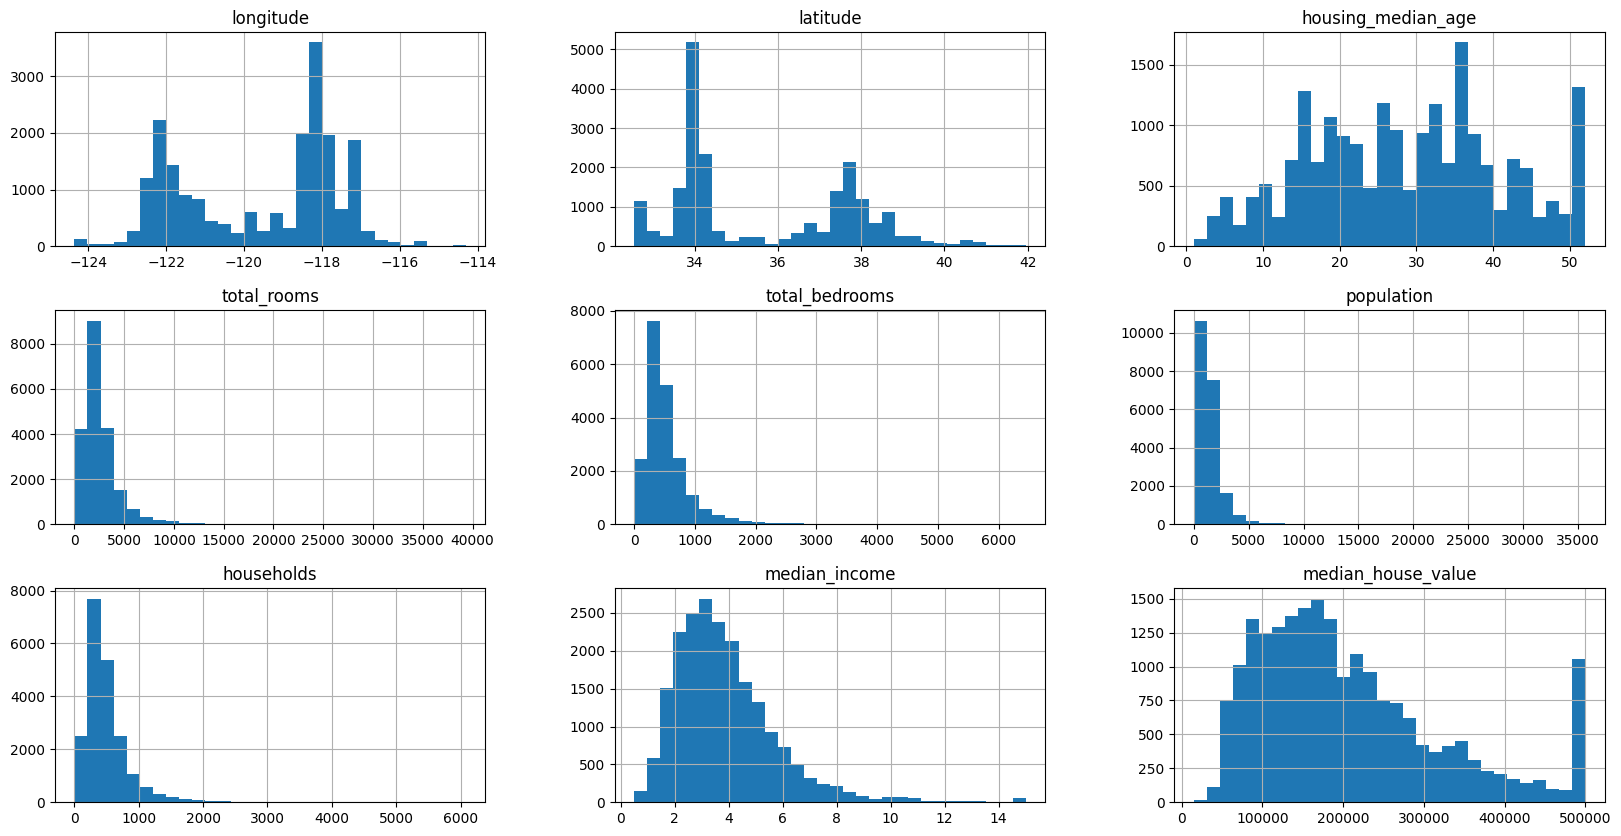

In [11]:
#histogram plotting
import matplotlib.pyplot as plt
df.hist(bins=30,figsize=(20,10))

In [12]:
#create a test set 
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(df,test_size=0.2,random_state=8)
train_set.shape,test_set.shape

((16512, 10), (4128, 10))

In [13]:
#correlation
df.corr()['median_house_value'].sort_values(ascending=False)

/var/folders/l8/0j8yzglx2vnbzf84d7s2hk4c0000gn/T/ipykernel_92279/2032827793.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['median_house_value'].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [14]:
df['median_income'].min(),df['median_income'].max()

(0.4999, 15.0001)

In [ ]:
#strantifying technique 


In [16]:
#creating a new variable 
import numpy as np 
df['income_cat']=pd.cut(df['median_income'],bins=[0.,1.5,3.0,4.5,6.0,np.inf],labels=[1,2,3,4,5])
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [19]:
#stratifying technique
strat_train_set,strat_test_set=train_test_split(df,test_size=0.2,stratify=df['income_cat'],random_state=8)

In [20]:
strat_train_set['income_cat'].value_counts()

3    5789
2    5265
4    2911
5    1890
1     657
Name: income_cat, dtype: int64

In [22]:
strat_test_set['income_cat'].value_counts()

3    1447
2    1316
4     728
5     472
1     165
Name: income_cat, dtype: int64

In [23]:
#no need of the column strat so we are dropping it 
strat_train_set.drop(columns='income_cat',inplace=True)
strat_test_set.drop(columns='income_cat',inplace=True)

<Axes: xlabel='longitude', ylabel='latitude'>

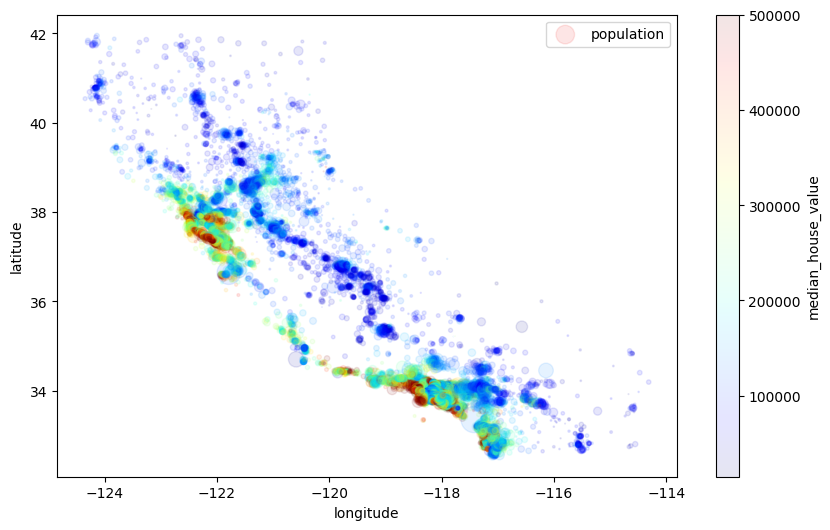

In [27]:
#plotting california
df.plot(kind='scatter',x='longitude',y='latitude',figsize=(10,6),s=df
        ['population']/100,label='population',alpha=0.1,cmap='jet',c='median_house_value',colorbar='True')



In [28]:
housing=strat_train_set.drop(columns='median_house_value')
housing_label=strat_train_set['median_house_value'].copy()

In [29]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        155
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [35]:
#datapipeline
housing_num=housing.drop(columns='ocean_proximity')
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline=Pipeline([
    ('impute',SimpleImputer(strategy='median')),
    ('standarize',StandardScaler())
])
housing_num_tr=num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[ 0.70903084, -0.73611778, -0.05246406, ...,  0.98070311,
         1.00253757, -0.19279129],
       [ 1.12365056, -0.68468381, -1.80430733, ...,  1.3601267 ,
         1.76722451, -0.12359366],
       [ 1.20357726, -0.97926016, -1.96356581, ...,  1.33251607,
         1.18574381, -0.06156895],
       ...,
       [ 0.60912247, -0.79690337, -0.21172254, ...,  0.87115123,
         0.77153839, -0.45386467],
       [-0.84953969,  1.16693897,  1.85863769, ..., -0.87188158,
        -0.7206632 , -0.88218324],
       [ 0.59413622, -0.74546941,  0.50494062, ...,  0.3367518 ,
         0.12367862, -0.8303905 ]])

In [38]:
#we have cleaned the numerical values ,also we need to clean the categorical column using ColumnTransform
from sklearn.preprocessing import StandardScaler, OneHotEncoder
num_attributes=list(housing_num)
cat_attributes=['ocean_proximity']
from sklearn.compose import ColumnTransformer
full_pipeline=ColumnTransformer([
    ('num',num_pipeline,num_attributes),
    ('cat',OneHotEncoder(),cat_attributes)
])


In [39]:
housing_prepared=full_pipeline.fit_transform(housing)

In [42]:
#linearRegression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(housing_prepared,housing_label)
some_data=housing.iloc[:5]
some_label=housing_label.iloc[:5]
some_prepared_data=full_pipeline.transform(some_data)
some_prediction=lr.predict(some_prepared_data)

from sklearn.metrics import mean_squared_error,mean_absolute_error
error=mean_squared_error(some_label,some_prediction)
np.sqrt(error)

44967.59907311041

In [45]:
#Decision tree 
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(housing_prepared,housing_label)
dtr_prediction=dtr.predict(some_prepared_data)
dtr_error=mean_squared_error(some_label,dtr_prediction)
np.sqrt(dtr_error) 
#the error is 0.0 the model is overfitted

0.0

In [47]:
#evaluate using cross validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(dtr,housing_prepared,housing_label,scoring='neg_mean_squared_error',cv=10)
np.sqrt(-scores)
np.sqrt(-scores).mean()

69624.87475598165

In [49]:
#Randomforest
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(housing_prepared,housing_label)
rfr_scores = cross_val_score(rfr,housing_prepared,housing_label,scoring='neg_mean_squared_error',cv=10)
np.sqrt(-rfr_scores),np.sqrt(-rfr_scores).mean()

(array([50709.97185971, 48849.50288633, 48673.85045731, 51594.76544967,
        46859.44904083, 47363.49319193, 48036.53754437, 49377.46325733,
        51263.16549952, 48383.54898577]),
 49111.174817276165)